In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/samantha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/samantha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/samantha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/samantha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/samantha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary i

In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('movies.db')
c = conn.cursor()

def create_table(query):
    c.execute(query)

def close_c_conn():
    c.close()
    conn.close()

In [5]:
full_junction = pd.read_sql_query('''SELECT * FROM genres
                  LEFT JOIN movie_genres
                  ON movie_genres.genre_id = genres.id
                  LEFT JOIN movies
                  ON movies.imdb_id = movie_genres.movie_id''', conn)

full_junction

,id,genre,genre_id,movie_id,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year
0,0,War,0,tt0441881,tt0441881,Danger Close,None,NaN,NaN,NaN,NaN,NaN,2019
1,0,War,0,tt0783640,tt0783640,The Last Full Measure,None,NaN,NaN,NaN,NaN,NaN,2019
2,0,War,0,tt1235187,tt1235187,Where Hands Touch,PG-13,67743.0,5.4,45.0,122.0,1009.0,2018
3,0,War,0,tt2368254,tt2368254,A Private War,R,1633208.0,6.7,75.0,110.0,7707.0,2018
4,0,War,0,tt2459244,tt2459244,The Precipice,None,NaN,6.6,NaN,86.0,8.0,2018
5,0,War,0,tt2584384,tt2584384,Jojo Rabbit,None,NaN,NaN,NaN,NaN,NaN,2019
6,0,War,0,tt2777020,tt2777020,Lost Division,None,NaN,NaN,NaN,75.0,NaN,2018
7,0,War,0,tt3238924,tt3238924,The Fort,None,NaN,NaN,NaN,70.0,NaN,2018
8,0,War,0,tt3486080,tt3486080,Lancaster Skies,None,NaN,8.6,NaN,98.0,57.0,2019
9,0,War,0,tt3833480,tt3833480,The Outpost,None,NaN,NaN,NaN,NaN,NaN,2019


In [203]:
all_rated = full_junction[pd.notnull(full_junction['imdb_rating'])].copy()

In [204]:
all_rated['score'] = all_rated['imdb_rating']*all_rated['votes']

In [205]:
all_rated.head()

,id,genre,genre_id,movie_id,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year,score
2,0,War,0,tt1235187,tt1235187,Where Hands Touch,PG-13,67743.0,5.4,45.0,122.0,1009.0,2018,5448.6
3,0,War,0,tt2368254,tt2368254,A Private War,R,1633208.0,6.7,75.0,110.0,7707.0,2018,51636.9
4,0,War,0,tt2459244,tt2459244,The Precipice,None,NaN,6.6,NaN,86.0,8.0,2018,52.8
8,0,War,0,tt3486080,tt3486080,Lancaster Skies,None,NaN,8.6,NaN,98.0,57.0,2019,490.2
10,0,War,0,tt4325644,tt4325644,Union,None,NaN,6.9,NaN,135.0,11.0,2018,75.9


In [24]:
all_rated.sort_values('score',ascending=False, inplace=True)

In [66]:
df = all_rated.groupby('genre').mean()['score'].reset_index()
df.sort_values('score', ascending=False,inplace=True)

In [67]:
df

,genre,score
1,Adventure,104821.066319
17,Sci-Fi,101442.876050
0,Action,64733.247718
3,Biography,59521.003846
11,Music,56644.242391
8,Fantasy,38769.648649
13,Mystery,31628.627832
2,Animation,31003.189151
5,Crime,29442.672644
19,Thriller,17685.460167


Text(0.5, 1.0, 'Top Scoring Genres')

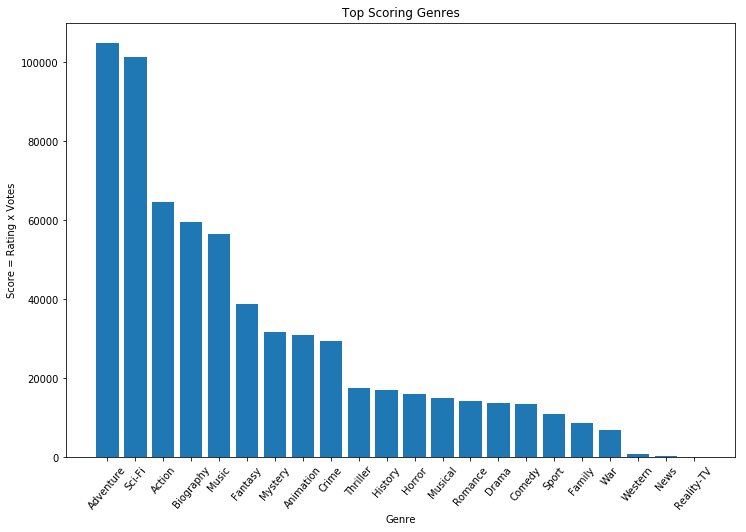

In [68]:
plt.figure(figsize=(12,8))
plt.bar('genre','score',data=df )
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Score = Rating x Votes')
plt.title('Top Scoring Genres')

In [27]:
all_certified = all_rated[pd.notnull(all_rated['certificate'])].copy()

In [75]:
all_votes = all_rated[pd.notnull(all_rated['votes'])].copy()

In [77]:
vote_df = all_votes.groupby('genre').mean()['votes'].reset_index()
vote_df.sort_values('votes', ascending=False,inplace=True)

Text(0.5, 1.0, 'Top Voted Genres')

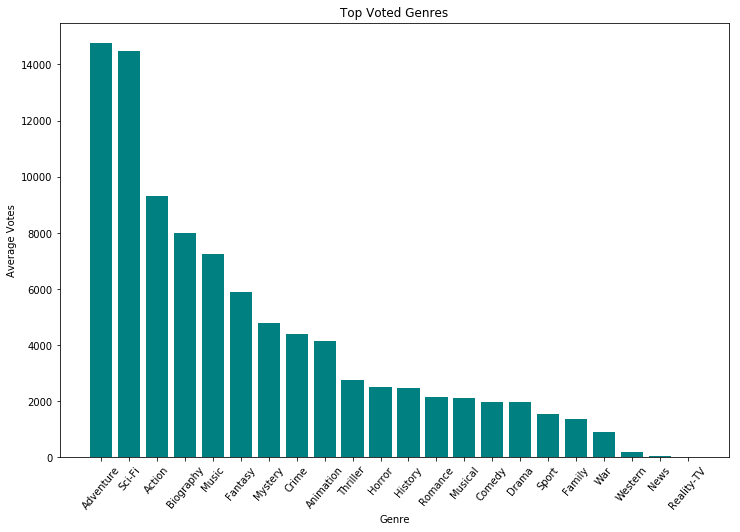

In [82]:
plt.figure(figsize=(12,8))
plt.bar('genre','votes',data=vote_df, color = 'teal')
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.title('Top Voted Genres')

In [79]:
rating_df = all_votes.groupby('genre').mean()['imdb_rating'].reset_index()
rating_df.sort_values('imdb_rating', ascending=False,inplace=True)

Text(0.5, 1.0, 'Top Rated Genres')

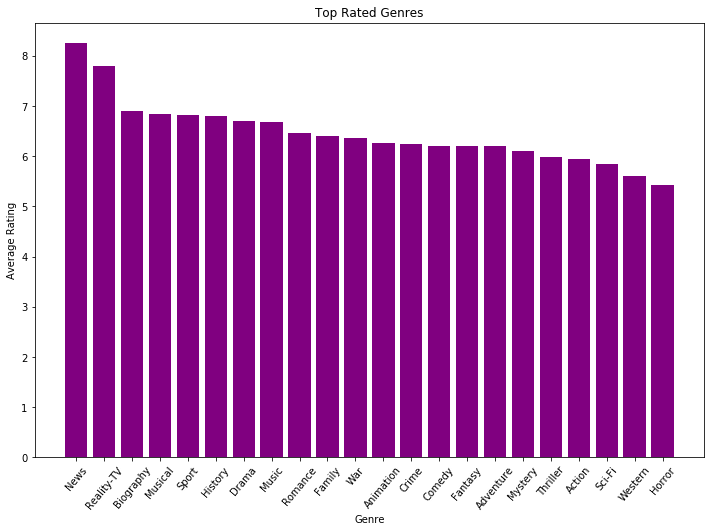

In [83]:
plt.figure(figsize=(12,8))
plt.bar('genre','imdb_rating',data=rating_df, color='purple')
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top Rated Genres')

In [71]:
all_revenue = all_rated[pd.notnull(all_rated['gross'])].copy()

In [73]:
gross_df = all_revenue.groupby('genre').mean()['gross'].reset_index()
gross_df.sort_values('gross', ascending=False,inplace=True)

Text(0.5, 1.0, 'Gross Revenue by Genre')

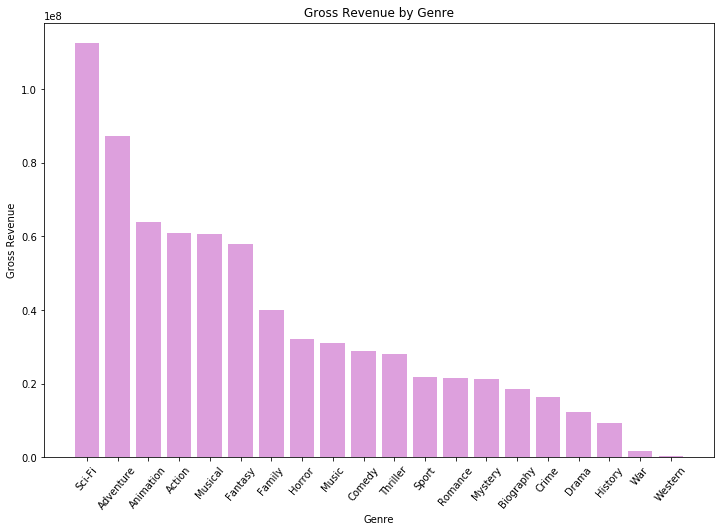

In [84]:
plt.figure(figsize=(12,8))
plt.bar('genre','gross',data=gross_df, color='plum')
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.title('Gross Revenue by Genre')

In [85]:
movies = pd.read_sql_query("select * from movies;", conn)
movies.head()

,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year
0,tt4633694,Spider-Man: Into the Spider-Verse,PG,189936471.0,8.5,87.0,117.0,160975.0,2018
1,tt1477834,Aquaman,PG-13,334826690.0,7.2,55.0,143.0,211622.0,2018
2,tt7959026,The Mule,R,103804407.0,7.1,58.0,116.0,32910.0,2018
3,tt6966692,Green Book,PG-13,84068561.0,8.3,69.0,130.0,158958.0,2018
4,tt1727824,Bohemian Rhapsody,PG-13,215983200.0,8.1,49.0,134.0,311167.0,2018


In [87]:
movies['score'] = movies['imdb_rating']*movies['votes']

In [91]:
certVscore = movies.groupby('certificate')['score'].mean().reset_index().dropna()

In [95]:
certVscore.sort_values('score',ascending=False,inplace=True)

Text(0.5, 1.0, 'Average Score by Certificate')

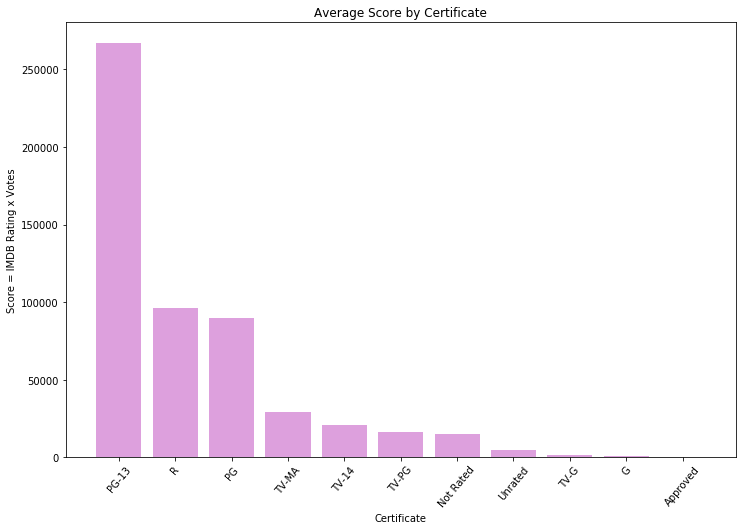

In [96]:
plt.figure(figsize=(12,8))
plt.bar('certificate','score',data=certVscore, color='plum')
plt.xticks(rotation=50)
plt.xlabel('Certificate')
plt.ylabel('Score = IMDB Rating x Votes')
plt.title('Average Score by Certificate')

In [97]:
certVrate = movies.groupby('certificate')['imdb_rating'].mean().reset_index().dropna()

In [98]:
certVrate.sort_values('imdb_rating',ascending=False,inplace=True)

Text(0.5, 1.0, 'Average Rating by Certificate')

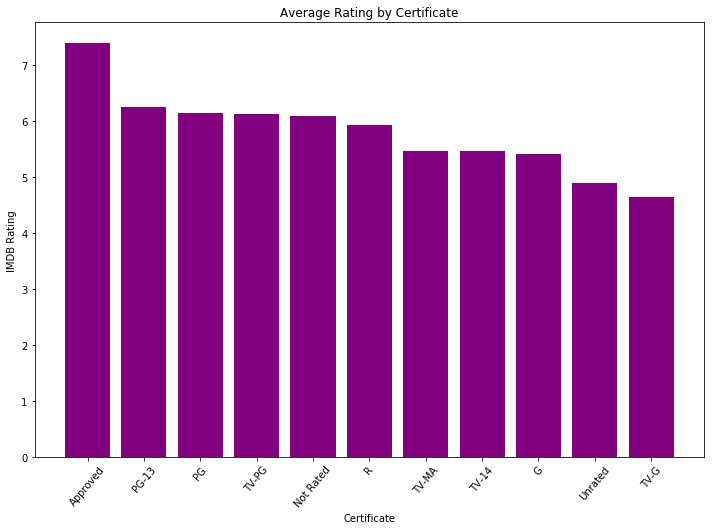

In [100]:
plt.figure(figsize=(12,8))
plt.bar('certificate','imdb_rating',data=certVrate, color='purple')
plt.xticks(rotation=50)
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.title('Average Rating by Certificate')

/Users/samantha/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/samantha/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


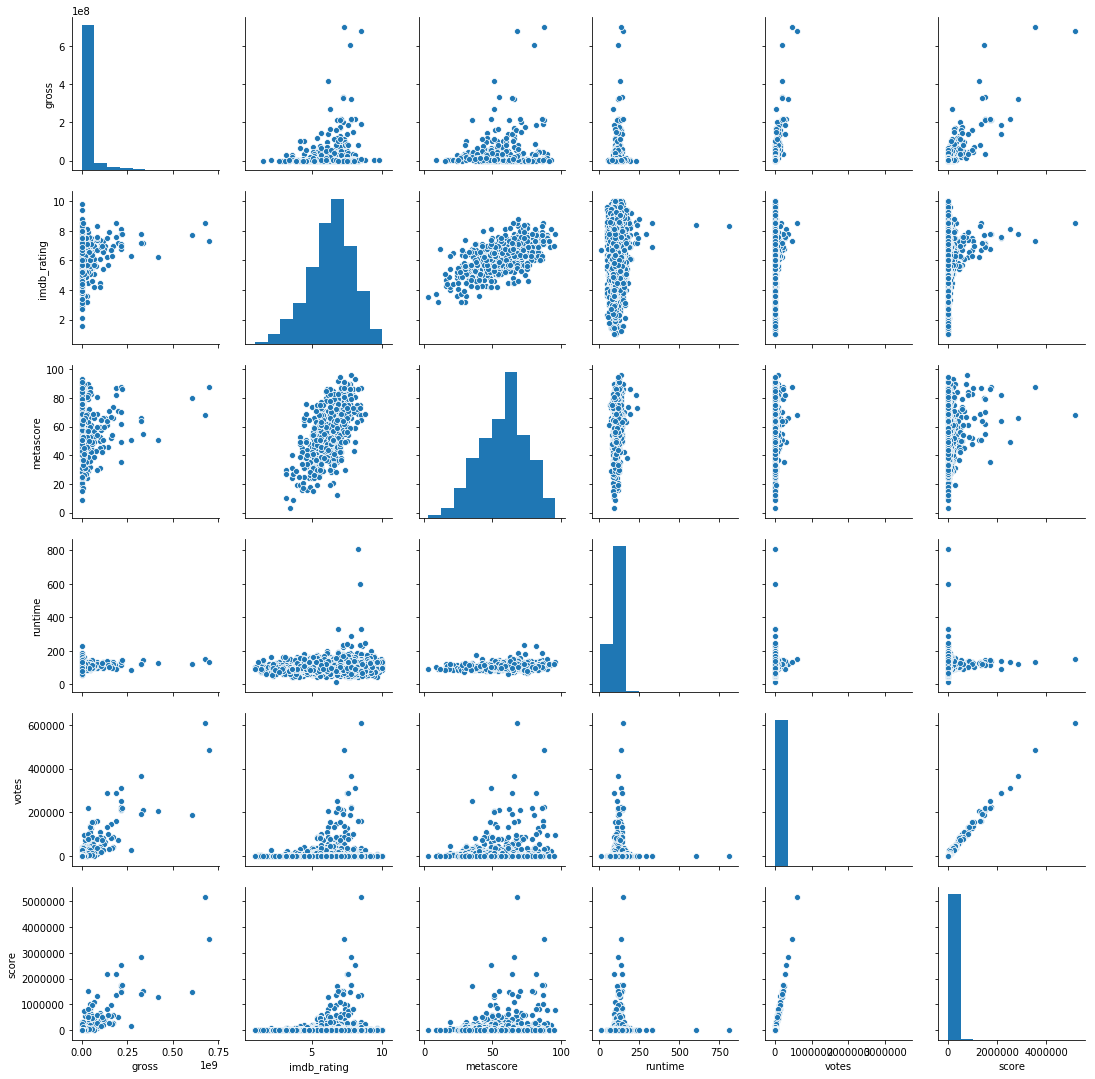

In [101]:
g = sns.pairplot(movies)

In [105]:
movies['gross_rev(M)'] = movies['gross']/1000000

Text(0.5, 1.0, 'Gross Revenue vs Votes')

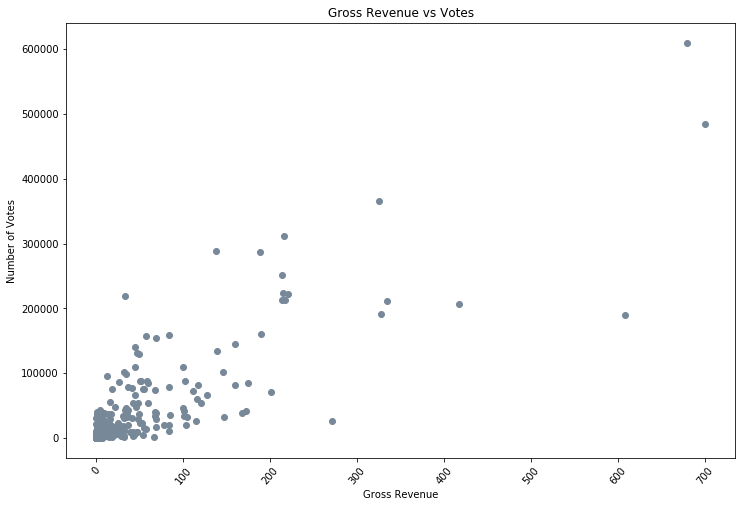

In [106]:
plt.figure(figsize=(12,8))
plt.scatter('gross_rev(M)','votes',data=movies, color='lightslategray')
plt.xticks(rotation=50)
plt.xlabel('Gross Revenue')
plt.ylabel('Number of Votes')
plt.title('Gross Revenue vs Votes')

In [103]:
movies.sort_values('gross',ascending=False).head()

,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year,score
17,tt1825683,Black Panther,PG-13,700059566.0,7.3,88.0,134.0,484940.0,2018,3540062.0
6,tt4154756,Avengers: Infinity War,PG-13,678815482.0,8.5,68.0,149.0,609674.0,2018,5182229.0
53,tt3606756,Incredibles 2,PG,608581744.0,7.7,80.0,118.0,189433.0,2018,1458634.1
19,tt4881806,Jurassic World: Fallen Kingdom,PG-13,417719760.0,6.2,51.0,128.0,206637.0,2018,1281149.4
1,tt1477834,Aquaman,PG-13,334826690.0,7.2,55.0,143.0,211622.0,2018,1523678.4


In [108]:
top_rated_movies = pd.read_sql_query('''SELECT * FROM tmdb_details
                  LEFT JOIN movies
                  ON movies.imdb_id = tmdb_details.imdb_id;''', conn)

top_rated_movies.columns

Index(['imdb_id', 'tmdb_id', 'original_lang', 'overview', 'popularity',
       'release_date', 'title', 'vote_avg', 'vote_count', 'budget', 'revenue',
       'status', 'tagline', 'director', 'imdb_id', 'title', 'certificate',
       'gross', 'imdb_rating', 'metascore', 'runtime', 'votes', 'year'],
      dtype='object')

In [109]:
top_rated_budgets = top_rated_movies[pd.notnull(top_rated_movies['budget'])].copy()

In [113]:
top_rated_budgets = top_rated_budgets[top_rated_budgets['budget'] != 0]

In [117]:
top_rated_budgets['score'] = top_rated_budgets['imdb_rating']*top_rated_budgets['votes']

Text(0.5, 1.0, 'Score vs Budget')

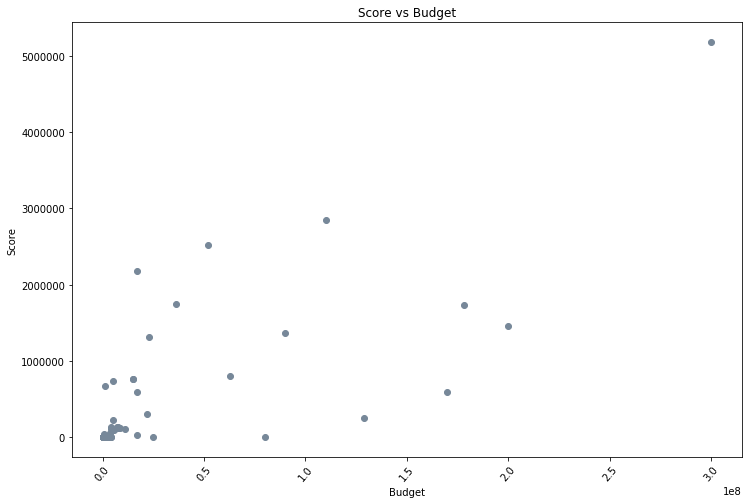

In [129]:
plt.figure(figsize=(12,8))
plt.scatter('budget','score',data=top_rated_budgets, color='lightslategray')
plt.xticks(rotation=50)
plt.xlabel('Budget')
plt.ylabel('Score')
plt.title('Score vs Budget')

Text(0.5, 1.0, 'Score vs Budget')

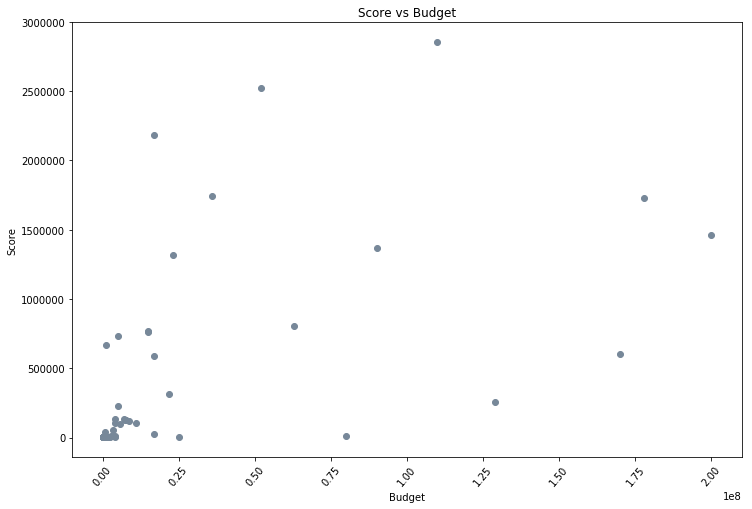

In [132]:
plt.figure(figsize=(12,8))
plt.scatter('budget','score',data=top_rated_budgets.drop(index=99), color='lightslategray')
plt.xticks(rotation=50)
plt.xlabel('Budget')
plt.ylabel('Score')
plt.title('Score vs Budget')

In [131]:
top_rated_budgets.sort_values('score')

,imdb_id,tmdb_id,original_lang,overview,popularity,release_date,title,vote_avg,vote_count,budget,...,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year,score
338,tt8233184,524582,en,"Every day, over 200 loving fans watch Scott At...",0.958,2018-05-25,Livescream,0.0,0,1500.0,...,tt8233184,Livescream,None,NaN,7.8,NaN,70.0,36,2018,280.8
149,tt9011126,567791,kn,8MM Bullet movie is a crime thriller movie wri...,1.177,2018-11-16,8MM Bullet,0.0,0,690000.0,...,tt9011126,8MM Bullet,None,NaN,8.3,NaN,146.0,34,2018,282.2
399,tt3378384,427612,en,"Aided by his Father, and his family, a man in ...",0.600,2017-04-08,Tapestry,0.0,0,200000.0,...,tt3378384,Tapestry,None,NaN,7.7,NaN,98.0,37,2019,284.9
43,tt5891260,542164,en,A grad student kidnaps two homophobic high-sch...,0.956,2018-06-30,Groupers,0.0,0,84.0,...,tt5891260,Groupers,None,NaN,8.9,NaN,109.0,36,2019,320.4
345,tt7753296,493691,de,,0.600,2018-09-06,Phantomschmerz,10.0,1,50000.0,...,tt7753296,Phantomschmerz,None,NaN,7.8,NaN,98.0,42,2018,327.6
24,tt8236566,564848,en,4 Friends travel across the United States to f...,0.600,,The Dip Run,0.0,0,150000.0,...,tt8236566,The Dip Run,R,NaN,9.0,NaN,96.0,43,2018,387.0
341,tt6801580,487283,en,"Sophie, a young volunteer, meets her kindred s...",3.644,2018-02-17,A Wish for Giants,9.3,6,25000.0,...,tt6801580,A Wish for Giants,None,NaN,7.8,NaN,78.0,55,2018,429.0
87,tt9185526,557165,lb,,1.223,2018-10-24,De Superjhemp Retörns,8.5,3,4000000.0,...,tt9185526,Superjhemp retörns,None,NaN,8.6,NaN,100.0,63,2018,541.8
64,tt7925418,541541,en,"Based on true events, Ellen tells of the troub...",0.998,2018-01-27,Ellen: The Story of Ellen Pakkies,8.3,3,650.0,...,tt7925418,Ellen: Die storie van Ellen Pakkies,None,NaN,8.7,NaN,123.0,75,2018,652.5
45,tt5564336,513230,en,"Zel, a lonely young man's life changes when hi...",1.803,2018-06-20,Lucid,0.0,0,2000000.0,...,tt5564336,Lucid,None,NaN,8.8,NaN,86.0,87,2018,765.6


In [133]:
directors = top_rated_movies[pd.notnull(top_rated_movies['director'])].copy()

In [135]:
directors = directors[directors['director'] != 'unknown']

In [137]:
directors['score'] = directors['imdb_rating']*directors['votes']

In [144]:
top_dir =directors.groupby('director').mean().sort_values('score',ascending=False).head(20)

In [147]:
top_dir_list = list(top_dir.reset_index()['director'])

In [151]:
top_rated_movies['score'] = top_rated_movies['imdb_rating']*top_rated_movies['votes']

In [155]:
top_dir_df = top_rated_movies[top_rated_movies['director'].isin(top_dir_list)]

In [157]:
top_dir_df

,imdb_id,tmdb_id,original_lang,overview,popularity,release_date,title,vote_avg,vote_count,budget,...,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year,score
56,tt8291224,554600,hi,Following the roguish terrorist attacks at Uri...,10.225,2019-01-11,Uri: The Surgical Strike,7.6,30,0.0,...,tt8291224,Uri: The Surgical Strike,Not Rated,4185825.0,8.8,NaN,138.0,26465,2019,232892.0
98,tt4633694,324857,en,Miles Morales is juggling his life between bei...,115.129,2018-12-07,Spider-Man: Into the Spider-Verse,8.5,2898,90000000.0,...,tt4633694,Spider-Man: Into the Spider-Verse,PG,189936471.0,8.5,87.0,117.0,160975,2018,1368287.5
99,tt4154756,299536,en,As the Avengers and their allies have continue...,129.988,2018-04-25,Avengers: Infinity War,8.3,12295,300000000.0,...,tt4154756,Avengers: Infinity War,PG-13,678815482.0,8.5,68.0,149.0,609674,2018,5182229.0
100,tt8108198,534780,hi,A series of mysterious events changes the life...,7.476,2018-10-05,Andhadhun,8.0,79,0.0,...,tt8108198,Andhadhun,Not Rated,1193046.0,8.5,NaN,139.0,37973,2018,322770.5
141,tt6966692,490132,en,"Tony Lip, a bouncer in 1962, is hired to drive...",58.067,2018-11-16,Green Book,8.3,2589,23000000.0,...,tt6966692,Green Book,PG-13,84068561.0,8.3,69.0,130.0,158958,2018,1319351.4
189,tt1727824,424694,en,"Singer Freddie Mercury, guitarist Brian May, d...",73.061,2018-10-24,Bohemian Rhapsody,8.1,6493,52000000.0,...,tt1727824,Bohemian Rhapsody,PG-13,215983200.0,8.1,49.0,134.0,311167,2018,2520452.7
227,tt6452574,496328,hi,Sanju explores some of the most crucial chapte...,9.600,2018-06-29,Sanju,7.9,70,21918618.0,...,tt6452574,Sanju,TV-MA,7909317.0,8.0,NaN,155.0,39080,2018,312640.0
255,tt5104604,399174,en,"In the future, an outbreak of canine flu leads...",15.561,2018-03-23,Isle of Dogs,7.9,1703,62770198.0,...,tt5104604,Isle of Dogs,PG-13,32015231.0,7.9,82.0,101.0,102073,2018,806376.7
290,tt2386490,166428,en,As Hiccup fulfills his dream of creating a pea...,379.047,2019-01-03,How to Train Your Dragon: The Hidden World,7.8,1140,129000000.0,...,tt2386490,How to Train Your Dragon: The Hidden World,PG,147460290.0,7.9,71.0,104.0,32232,2019,254632.8
301,tt1517451,332562,en,Seasoned musician Jackson Maine discovers — an...,50.296,2018-10-03,A Star Is Born,7.5,4802,36000000.0,...,tt1517451,A Star Is Born,R,215252091.0,7.8,88.0,136.0,223942,2018,1746747.6


In [166]:
from datetime import datetime

In [181]:
top_rated_movies['release_day']= [datetime.strptime(x, "%Y-%m-%d").strftime('%A') if len(x)==10 else '' for x in top_rated_movies['release_date']]

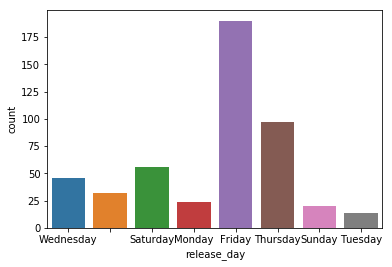

In [185]:
sns.countplot(top_rated_movies['release_day'])

In [179]:
len(top_rated_movies['release_date'][0])


10

In [186]:
top_10_movies=top_rated_movies.sort_values('score',ascending = False).copy()[:10]

Text(0.5, 1.0, 'Release Day of Top 10 Movies')

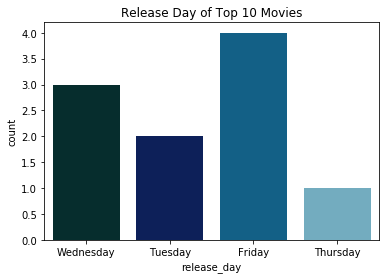

In [192]:
sns.countplot(top_10_movies['release_day'], palette='ocean')
plt.title('Release Day of Top 10 Movies')

In [193]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [195]:
text = " ".join(descr for descr in top_10_movies['overview'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2691 words in the combination of all review.


In [196]:
stopwords = set(STOPWORDS)

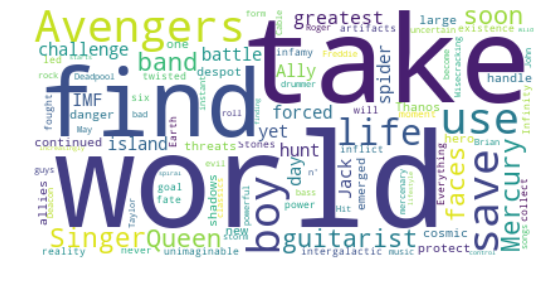

In [200]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_words=100,background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(9,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [201]:
top10_genre = all_rated[all_rated['imdb_id'].isin(top_10_movies['imdb_id'])]

In [202]:
all_rated

,id,genre,genre_id,movie_id,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year,score


In [210]:
top10_ids = top_10_movies['imdb_id'].copy()


In [217]:
top10_ids = top10_ids.iloc[:,:1]

In [221]:
top10_ids = list(top10_ids['imdb_id'])

In [222]:
top10_genre = all_rated[all_rated['imdb_id'].isin(top10_ids)]

In [227]:
genre_counts = top10_genre.groupby('genre').count()['title'].reset_index().sort_values('title',ascending=False)

Text(0.5, 1.0, 'Top 10 by Genre')

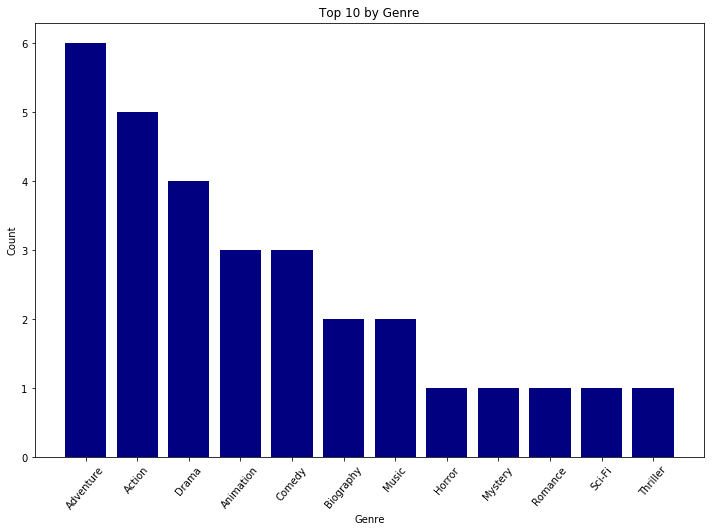

In [228]:
plt.figure(figsize=(12,8))
plt.bar('genre','title',data=genre_counts, color='navy')
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 by Genre')

Text(0.5, 1.0, 'Certificate of Top 10 Movies')

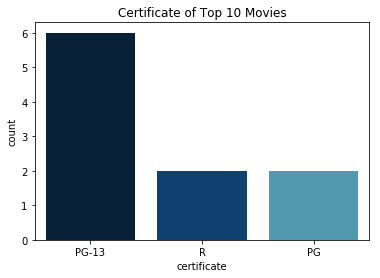

In [229]:
sns.countplot(top_10_movies['certificate'], palette='ocean')
plt.title('Certificate of Top 10 Movies')

In [230]:
close_c_conn()